## EXPLORING THE ASKHI/BIDLO DF with spread too

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

### import bidlow

In [9]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_bidlo.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_bidlo = pd.read_csv(StringIO(csv_string))
df_bidlo.index = df_bidlo['Unnamed: 0']
df_bidlo = df_bidlo.drop('Unnamed: 0', axis=1)
df_bidlo.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_bidlo = df_bidlo.T
df_bidlo.index = pd.to_datetime(df_bidlo.index)
df_bidlo.head()

date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,T_A T & T CORP,ADM_ARCHER DANIELS MIDLAND CO,FRC_FIRST REPUBLIC BANK S F,FISV_FISERV INC,CF_CHARTER ONE FINANCIAL INC,PHBK_PEOPLES HERITAGE FINL GROUP INC,...,CDB_CANANDAIGUA BRANDS,STZ_CONSTELLATION BRANDS INC,VIA_VIACOM INC,FCX_FREEPORT MCMORAN INC,IT_GARTNER INC,PLD_PROLOGIS TRUST,DVA_DAVITA,TAP_TRAVELERS PPTY CASUALTY CORP,V_VIVENDI UNIVERSAL,CMG_CHIPOTLE MEXICAN GRILL INC
2000-01-03,111.6250,112.0000,34.6250,56.5000,50.5625,11.8750,22.6250,37.000,18.0000,14.0625,...,48.2500,NaN,56.875,18.2500,13.7500,18.4375,NaN,33.2500,NaN,NaN
2000-01-04,105.0000,112.2500,34.0000,54.0625,51.2500,11.8125,21.5000,35.000,17.1250,13.6875,...,47.3125,NaN,53.625,17.3750,13.3750,18.3125,NaN,32.5000,NaN,NaN
2000-01-05,96.0000,109.3750,33.1875,54.6875,50.6250,11.6250,21.1250,35.375,17.1250,13.8750,...,47.2500,NaN,51.000,17.3750,12.8750,18.4375,NaN,33.1875,NaN,NaN
2000-01-06,94.6875,108.3750,33.3750,54.5000,47.5000,11.5625,21.1250,36.125,17.3750,13.7500,...,49.5625,NaN,49.750,17.5000,12.3125,19.0000,NaN,34.1875,NaN,NaN
2000-01-07,93.5625,107.3125,34.5000,56.4375,47.8125,11.8125,21.4375,36.125,17.4375,14.0000,...,51.7500,NaN,50.750,17.3125,12.1250,19.1875,NaN,34.9375,NaN,NaN


### import askhi

In [10]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_askhi.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_askhi = pd.read_csv(StringIO(csv_string))
df_askhi.index = df_askhi['Unnamed: 0']
df_askhi = df_askhi.drop('Unnamed: 0', axis=1)
df_askhi.index.names = ['date']

#df_askhi.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_askhi = df_askhi.T
df_askhi.index = pd.to_datetime(df_askhi.index)
df_askhi.head()

date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,T_A T & T CORP,ADM_ARCHER DANIELS MIDLAND CO,FRC_FIRST REPUBLIC BANK S F,FISV_FISERV INC,CF_CHARTER ONE FINANCIAL INC,PHBK_PEOPLES HERITAGE FINL GROUP INC,...,CDB_CANANDAIGUA BRANDS,STZ_CONSTELLATION BRANDS INC,VIA_VIACOM INC,FCX_FREEPORT MCMORAN INC,IT_GARTNER INC,PLD_PROLOGIS TRUST,DVA_DAVITA,TAP_TRAVELERS PPTY CASUALTY CORP,V_VIVENDI UNIVERSAL,CMG_CHIPOTLE MEXICAN GRILL INC
2000-01-03,125.1875,118.625,37.2500,58.5000,53.4375,12.0625,23.4375,38.3125,19.3125,15.3125,...,56.375,NaN,60.6875,21.4375,16.625,19.2500,NaN,35.1250,NaN,NaN
2000-01-04,118.6250,117.125,35.1250,56.4375,53.2500,12.1875,22.5000,38.2500,18.1250,14.1250,...,56.375,NaN,57.0000,21.0000,16.125,19.0625,NaN,33.4375,NaN,NaN
2000-01-05,106.3750,116.375,34.9375,56.2500,52.3750,11.8750,21.5625,38.3750,18.0625,14.1250,...,56.500,NaN,54.2500,20.8125,15.375,19.1250,NaN,34.2500,NaN,NaN
2000-01-06,105.0000,113.875,35.0000,56.1250,50.8125,11.8750,21.5000,37.9375,18.5000,14.2500,...,56.500,NaN,51.4375,20.9375,14.875,19.3125,NaN,35.2500,NaN,NaN
2000-01-07,103.5000,112.250,35.5000,59.3750,49.8750,12.0000,22.1250,38.3750,18.2500,14.3750,...,56.250,NaN,54.1250,20.5000,15.250,19.3750,NaN,35.9375,NaN,NaN


In [ ]:
#df.describe()

In [6]:
#df_bidlo.T['ORCL_ORACLE CORP']

2000-01-03    111.6250
2000-01-04    105.0000
2000-01-05     96.0000
2000-01-06     94.6875
2000-01-07     93.5625
                ...   
2018-12-24     42.6800
2018-12-26     42.4000
2018-12-27     43.4600
2018-12-28     44.7400
2018-12-31     44.8400
Name: ORCL_ORACLE CORP, Length: 4779, dtype: float64

### NOTE IF YOU DO NOT CONVERT THE DATES INTO DATETIME FORMAT IT WILL TAKE FOREVER TO RENDER THE PLOT B/C THERE IS ONE DASH PER DAY NONO

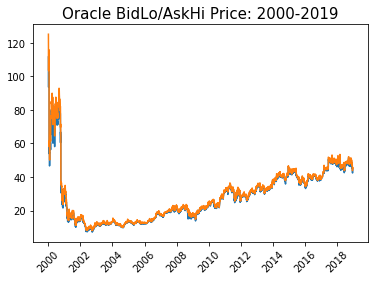

In [12]:
fig, ax = plt.subplots()
ax.plot(df_bidlo['ORCL_ORACLE CORP'])
ax.plot(df_askhi['ORCL_ORACLE CORP'])
#ax.xaxis.set_major_locator(dates.MonthLocator())
#ax.xaxis.set_major_locator(dates.YearLocator(3))

# 16 is a slight approximation since months differ in number of days.
#ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
#ax.xaxis.set_minor_locator(dates.YearLocator())


#labels = ax.get_xticklabels()
# for tick in labels:
#     print(labels)
#     plt.xlabel(tick, rotation=45)

#ax.xaxis.set_major_formatter(rotation=45)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
# ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))


plt.xticks(rotation=45)
plt.title('Oracle BidLo/AskHi Price: 2000-2019', fontsize=15)

plt.show()

In [ ]:
### Plot a sample of the 

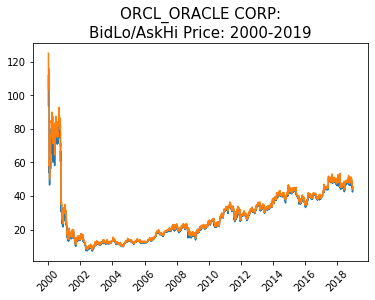

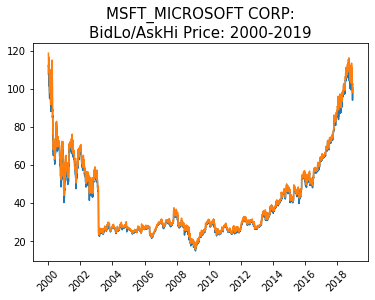

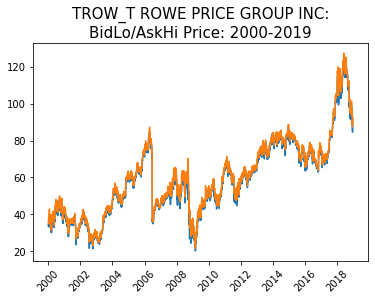

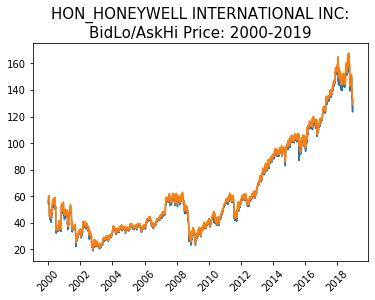

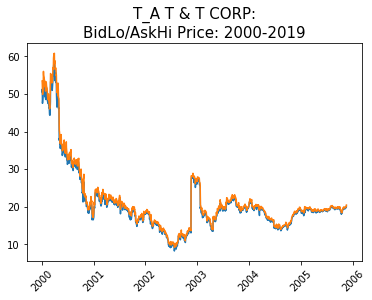

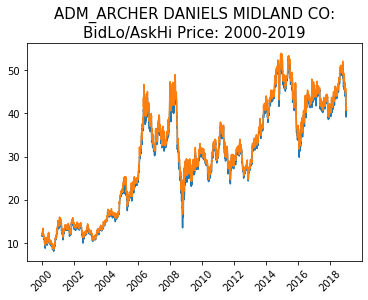

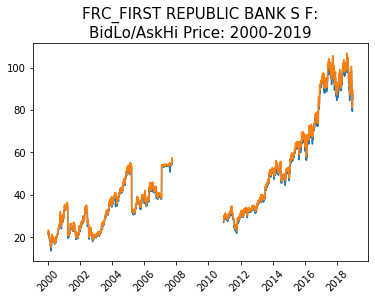

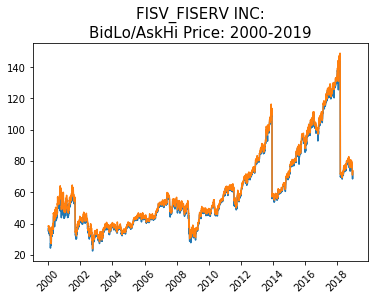

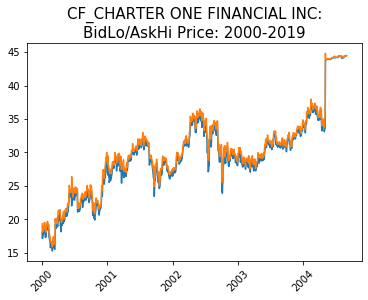

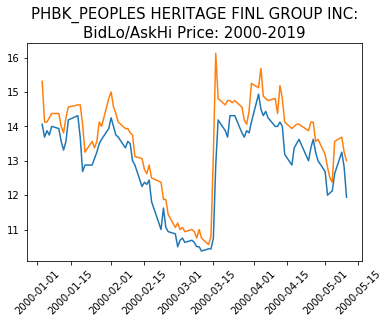

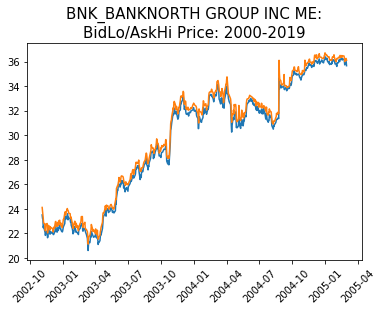

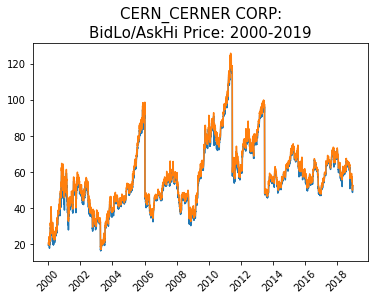

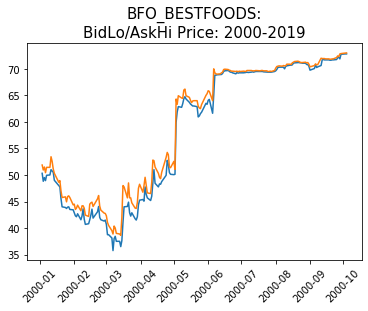

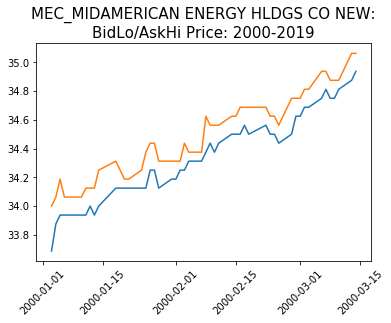

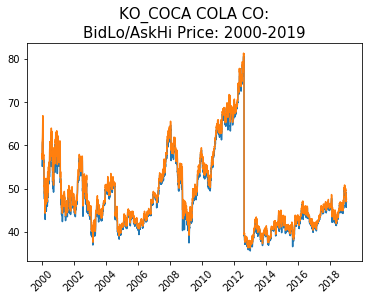

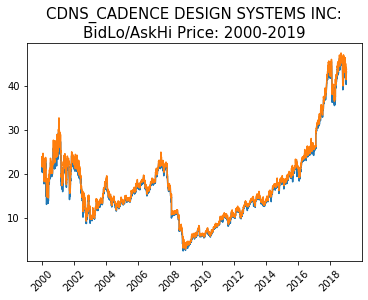

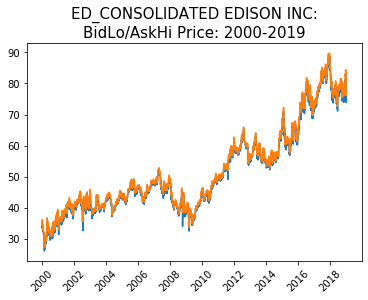

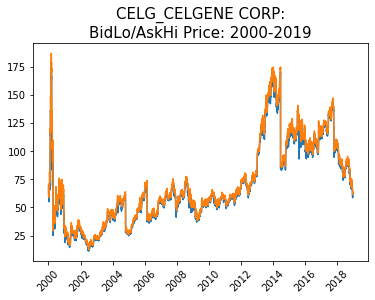

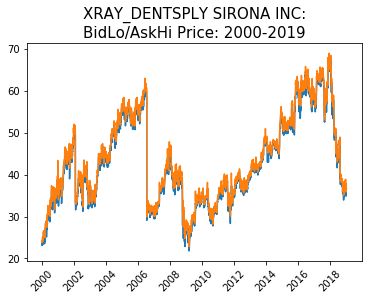

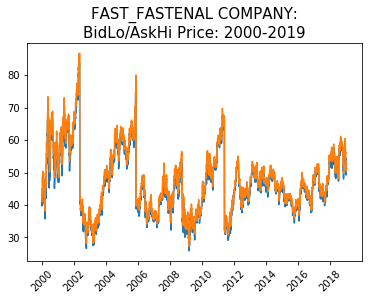

In [17]:
key_list = df_bidlo.columns

for company in key_list[:20]:
    fig, ax = plt.subplots()
    ax.plot(df_bidlo[company])
    ax.plot(df_askhi[company])
    plt.xticks(rotation=45)
    plt.title('{}:\nBidLo/AskHi Price: 2000-2019'.format(company), fontsize=15)
    plt.show()
    print('')
    print('')

In [74]:
# df['ORCL_ORACLE CORP'].plot()
# plt.title('ORACLE Timeseries', fontsize=15)
# plt.xticks(rotation=20, location='center')
# plt.show()

In [33]:
# fig, ax = plt.subplots()

# ax.plot(x=df['ORCL_ORACLE CORP'].index, y=df['ORCL_ORACLE CORP'])

# ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
# ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))

# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
# ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))

# plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

# plt.show()

In [75]:
# fig, ax = plt.subplots()

# ax.plot(df.loc['ORCL_ORACLE CORP', :].index, df.loc['ORCL_ORACLE CORP', :].get_values())

# ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
# ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))

# # ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
# # ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))

# plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

# plt.show()

### 20, 50, 100 day moving average